### Cella usa e getta (ogni volta che re-inizializzi il kernel)

In [1]:
# libraries
import os
import sys
import platform
print(sys.version)

strong_pc = platform.system() == 'Linux'
in_colab = 'google.colab' in sys.modules
if in_colab:
    if not os.getcwd().split('/')[-1].split('_')[-1]=='2023':
        from google.colab import drive
        drive.mount('/content/drive')
        os.chdir(r'/content/drive/MyDrive/Human_Data_Analytics_Project_2023')

    #!pip install tensorflow==2.11.0
    #!pip install tensorflow_text==2.11.0
    if not 'tensorflow_io' in sys.modules:
        print('Installing tensorflow-IO')
        !pip install tensorflow-io
    if not 'keras' in sys.modules and False:
        print('Installing keras')
        !pip install keras==2.11.0
    if not 'scikeras' in sys.modules:
        print('Installing scikeras')
        !pip install scikeras[tensorflow]
    if not 'keras-tuner' in sys.modules:
        print('installing keras tuner')
        !pip install keras-tuner
        !pip install numba==0.57.0


if 'DEEPNOTE_ENV' in os.environ:
    os.chdir('/..')
    os.chdir('datasets')
    os.chdir('googledrivedeepnoteintegration')
    os.chdir('Human_Data_Analytics_Project_2023')
    if not 'librosa' in sys.modules:
        print('Installing Librosa')
        !pip install librosa
    if not 'scikeras' in sys.modules:
        print('Installing scikeras')
        !pip install scikeras[tensorflow]
    if not 'keras-tuner' in sys.modules:
        print('installing keras tuner')
        !pip install keras-tuner
        !pip install numba==0.57.0

main_dir = os.getcwd()
if main_dir not in sys.path:
    print('Adding the folder for the modules')
    sys.path.append(main_dir)

#BASE LIBRARIES
import numpy as np
import pandas as pd
import h5py
import shutil
import time
import random
import subprocess
import itertools
import warnings
import pickle
import json

#PLOT LIBRARIES
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd
#import plotly.express as px

#AUDIO LIBRARIES
import librosa
from scipy.io import wavfile
from scipy import signal
from scipy.fft import fft,ifft,fftfreq, fftshift
from scipy.signal import stft,spectrogram,periodogram
#from pydub import AudioSegment

#MACHINE LEARNING LIBRARIES
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, LeaveOneOut, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.utils import check_random_state
from scikeras.wrappers import KerasClassifier
import tensorflow as tf
from tensorflow.keras.models import load_model

# GPU SETTINGS FOR LINUX and repressing warnings for windows. References for gpu: https://www.tensorflow.org/guide/gpu
show_gpu_activity = False
if sys.platform == 'linux' and not in_colab:
    if show_gpu_activity:
        tf.debugging.set_log_device_placement(True)

    gpus = tf.config.list_physical_devices('GPU')
    if gpus:
    # Restrict TensorFlow to only allocate a part of memory on the first GPU
        try:
            tf.config.set_logical_device_configuration(
                gpus[0],
                [tf.config.LogicalDeviceConfiguration(memory_limit=6800)])
            logical_gpus = tf.config.list_logical_devices('GPU')
            print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
        except RuntimeError as e:
            # Virtual devices must be set before GPUs have been initialized
            print(e)
else:
    warnings.filterwarnings("ignore", category=UserWarning)

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.utils import plot_model as tf_plot
if in_colab:
    import tensorflow_io as tfio
print("TensorFlow version:", tf.__version__)
# show keras version
import keras
print(f'keras version = {keras.__version__}')
#import keras_tune as kt
from keras import layers
import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras.regularizers import L1L2
# kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4) # we may use this in some layers...

#RANDOM SETTINGS
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
check_random_state(seed)

#EVALUATION LIBRAIRES
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve
from sklearn.metrics import make_scorer
from sklearn.metrics import RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import precision_recall_fscore_support, auc

#OUR PERSONAL FUNCTIONS
import importlib
from Preprocessing.data_loader import download_dataset,load_metadata
from Preprocessing.exploration_plots import one_random_audio, plot_clip_overview, Spectral_Analysis
from Models.basic_ml import basic_ML_experiments, basic_ML_experiments_gridsearch, build_dataset, extract_flatten_MFCC
from Visualization.model_plot import confusion_matrix,listen_to_wrong_audio

importlib.reload(importlib.import_module('Preprocessing.data_loader'))
importlib.reload(importlib.import_module('Models.basic_ml'))
importlib.reload(importlib.import_module('Visualization.model_plot'))

from Preprocessing.data_loader import load_metadata
df_ESC10, df_ESC50 = load_metadata(main_dir,heads = False, ESC_US = False, statistics=False)

from Preprocessing.data_loader import load_metadata
from Models.basic_ml import basic_ML_experiments, basic_ML_experiments_gridsearch, build_dataset, extract_flatten_MFCC

importlib.reload(importlib.import_module('Models.ann_utils'))
importlib.reload(importlib.import_module('Visualization.model_plot'))

from Models.ann_utils import *
from Models.ann_utils import MFCCWithDeltaLayer,OutputCutterLayer
from Visualization.model_plot import plot_history, confusion_matrix, listen_to_wrong_audio, visualize_the_weights

ESC10_path = os.path.join(main_dir,'Data', 'ESC-10-depth')
samplerate = 44100

3.11.4 (main, Jul  5 2023, 08:54:11) [Clang 14.0.6 ]


/Users/leonardo/anaconda3/envs/DSEnv3/lib/python3.11/site-packages/tensorflow_io-0.33.0-py3.11-macosx-11.1-arm64.egg/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/Users/leonardo/anaconda3/envs/DSEnv3/lib/python3.11/site-packages/tensorflow_io-0.33.0-py3.11-macosx-11.1-arm64.egg/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ["[Errno 2] The file to load file system plugin from does not exist.: '/Users/leonardo/anaconda3/envs/DSEnv3/lib/python3.11/site-packages/tensorflow_io-0.33.0-py3.11-macosx-11.1-arm64.egg/tensorflow_io/python/ops/libtensorflow_io_plugins.so'"]
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/Users/leonardo/anaconda3/envs/DSEnv3/lib/python3.11/site-packages/tensorflow_io-0.33.0-py3.11-macosx-11.1-arm64.egg/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open fil

TensorFlow version: 2.12.0
keras version = 2.12.0


### 2.3.4 CNN ATTENTION - STFT Preprocessed Audio

In [2]:
importlib.reload(importlib.import_module('Models.ann_utils'))
from Models.ann_utils import create_dataset, compile_fit_evaluate, K_fold_training, create_dataset_lite

#### Create the dataset ESC-10

Preprocessing: STFT


2023-09-03 03:11:45.489253: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype uint8 and shape [400,10]
	 [[{{node Placeholder/_1}}]]
2023-09-03 03:11:45.505216: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


The max value is 80.0
Audio shape: (30, 501, 442, 1)
Label shape: (30, 10)
Label: dog


2023-09-03 03:11:46.651539: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [400]
	 [[{{node Placeholder/_0}}]]
2023-09-03 03:11:46.651734: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [400]
	 [[{{node Placeholder/_0}}]]
2023-09-03 03:11:46.748016: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipel

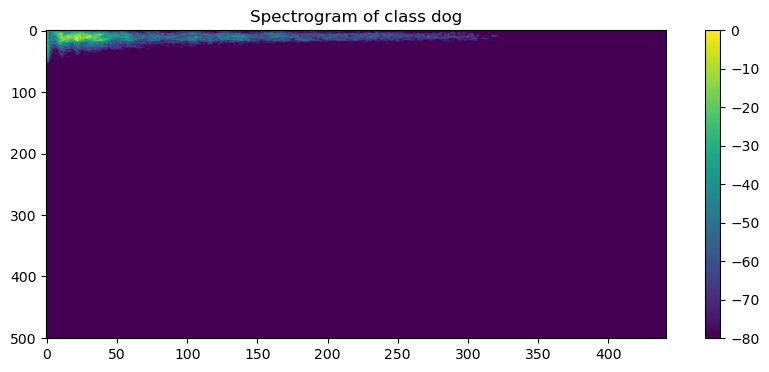

In [3]:
batch_size = 30

dataset, label = create_dataset_lite(df_ESC10,
                                     batch_size = batch_size,
                                     preprocessing = 'STFT',
                                     ndim = 3, )

INPUT_DIM, n_labels = example_batch(dataset, label_names = list(label.columns))

#### Build the model

We are going to keep this function for sections 2.3.2, 2.3.3 and 2.3.4 to avoid repeating the code

In [4]:
import tensorflow as tf
import os

# Define your self-attention layer separately
self_attention_layer = tf.keras.layers.Attention(use_scale=True)

def build_model(n_labels = n_labels,   # arguments to build the model
                 INPUT_DIM = INPUT_DIM,
                 n_units = 8,
                 kernel_size = (3,3),
                 activation = 'relu',
                 #arguments to compile the model
                 loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                 learning_rate = 1e-3,
                 metrics = ['accuracy'],
                 verbose = 0,
                 compile = True):

    input_layer = tf.keras.layers.Input(shape=INPUT_DIM)

    # Convolutional layer 1
    x = tf.keras.layers.Conv2D(n_units, kernel_size, strides=2, activation=activation, padding="same")(input_layer)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

    # Continue with the rest of your model
    x = tf.keras.layers.Conv2D(2 * n_units, (3, 3), strides=2, activation=activation, padding="same")(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

    x = tf.keras.layers.Conv2D(4 * n_units, (3, 3), activation=activation, padding="same")(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

    # Apply self-attention layer 3
    x = self_attention_layer([x, x])

    x = tf.keras.layers.Flatten()(x)

    output_layer = tf.keras.layers.Dense(n_labels, activation='softmax')(x)

    model = tf.keras.Model(inputs=input_layer, outputs=output_layer, name='CNN')

    if compile:
        model.compile(loss=loss,
                      optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate) if sys.platform == 'darwin' else tf.keras.optimizers.Adam(learning_rate=learning_rate),
                      metrics=metrics)
        if verbose > 0:
            model.summary()

    print(f'n_units {n_units}, activation {activation}, learning_rate {learning_rate}, kernel size {kernel_size}')

    return model


#### Run a grid search to find the best params

In [5]:
epochs = 50
patience = 10
params = {
    'INPUT_DIM': [INPUT_DIM],
    'n_units': [16, 32],
    'activation': ['relu', 'tanh'],
    'learning_rate': [1e-3, 1e-4],
    'kernel_size': [(3, 3), (5, 5), (7,7)]
}
K_fold = 4

model_cv, result, best_params = K_fold_training(dataset, build_model, params = params, epochs =  epochs, patience = patience, verbose = 0, K=K_fold)

2023-09-03 03:11:47.098185: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [400]
	 [[{{node Placeholder/_0}}]]
2023-09-03 03:11:47.098369: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype uint8 and shape [400,10]
	 [[{{node Placeholder/_1}}]]


(400, 501, 442, 1)
(400, 10)
n_units 16, activation relu, learning_rate 0.001, kernel size (3, 3)
accuracy on test for this fold is 0.53
n_units 16, activation relu, learning_rate 0.001, kernel size (3, 3)
accuracy on test for this fold is 0.51
n_units 16, activation relu, learning_rate 0.001, kernel size (3, 3)
accuracy on test for this fold is 0.45
n_units 16, activation relu, learning_rate 0.001, kernel size (3, 3)
accuracy on test for this fold is 0.55
n_units 32, activation relu, learning_rate 0.001, kernel size (3, 3)
accuracy on test for this fold is 0.54
n_units 32, activation relu, learning_rate 0.001, kernel size (3, 3)
accuracy on test for this fold is 0.68
n_units 32, activation relu, learning_rate 0.001, kernel size (3, 3)
accuracy on test for this fold is 0.7
n_units 32, activation relu, learning_rate 0.001, kernel size (3, 3)
accuracy on test for this fold is 0.64
n_units 16, activation relu, learning_rate 0.0001, kernel size (3, 3)
accuracy on test for this fold is 0.54

,mean_accuracy
"{'INPUT_DIM': (501, 442, 1), 'activation': 'tanh', 'kernel_size': (7, 7), 'learning_rate': 0.001, 'n_units': 32}",0.6925
"{'INPUT_DIM': (501, 442, 1), 'activation': 'tanh', 'kernel_size': (5, 5), 'learning_rate': 0.001, 'n_units': 32}",0.6775
"{'INPUT_DIM': (501, 442, 1), 'activation': 'relu', 'kernel_size': (7, 7), 'learning_rate': 0.001, 'n_units': 16}",0.6625
"{'INPUT_DIM': (501, 442, 1), 'activation': 'relu', 'kernel_size': (5, 5), 'learning_rate': 0.001, 'n_units': 32}",0.6525
"{'INPUT_DIM': (501, 442, 1), 'activation': 'relu', 'kernel_size': (3, 3), 'learning_rate': 0.001, 'n_units': 32}",0.6400
"{'INPUT_DIM': (501, 442, 1), 'activation': 'tanh', 'kernel_size': (7, 7), 'learning_rate': 0.001, 'n_units': 16}",0.6400
"{'INPUT_DIM': (501, 442, 1), 'activation': 'relu', 'kernel_size': (5, 5), 'learning_rate': 0.001, 'n_units': 16}",0.6375
"{'INPUT_DIM': (501, 442, 1), 'activation': 'tanh', 'kernel_size': (7, 7), 'learning_rate': 0.0001, 'n_units': 32}",0.6325
"{'INPUT_DIM': (501, 442, 1), 'activation': 'tanh', 'kernel_size': (5, 5), 'learning_rate': 0.001, 'n_units': 16}",0.6325
"{'INPUT_DIM': (501, 442, 1), 'activation': 'tanh', 'kernel_size': (3, 3), 'learning_rate': 0.001, 'n_units': 32}",0.6175


In [6]:
print("The best params are:", {key: value for key, value in best_params.items() if key != 'INPUT_DIM'})

# save the best_params in pickle
with open(os.path.join(main_dir,'Models','best_params_CNN_STFT_231_Attention.pickle'), 'wb') as handle:
    pickle.dump(best_params, handle, protocol=pickle.HIGHEST_PROTOCOL)

The best params are: {'activation': 'tanh', 'kernel_size': (7, 7), 'learning_rate': 0.001, 'n_units': 32}


#### Train the best model on ESC-50

In [7]:
# refit only the best model on ESC-50
seed = 42
tf.random.set_seed(seed)
ESC50_path = os.path.join(main_dir, 'data', 'ESC-50-depth')
batch_size = 30
preprocessing = 'STFT'

train, val, test, label_names, INPUT_DIM, n_labels = create_dataset(ESC50_path,
                                                verbose=0,
                                                batch_size=batch_size,
                                                validation_split=0.25,  # this is the splitting of train vs validation + test
                                                normalize=True,  # normalization preprocessing (default is true)
                                                preprocessing=preprocessing,  # "STFT", "MEL", "MFCC" or None
                                                show_example_batch=True,
                                                ndim=3)

Found 2000 files belonging to 50 classes.
Using 1500 files for training.
Using 500 files for validation.


2023-09-03 06:54:49.900041: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1500]
	 [[{{node Placeholder/_4}}]]
2023-09-03 06:54:49.900218: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1500]
	 [[{{node Placeholder/_4}}]]
2023-09-03 06:54:56.856768: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1500]


In [8]:
# upload the best parameters
with open(os.path.join(main_dir,'Models','best_params_CNN_STFT_231_Attention.pickle'), 'rb') as handle:
    best_params = pickle.load(handle)

n_units 32, activation tanh, learning_rate 0.001, kernel size (7, 7)
Model: "CNN"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_97 (InputLayer)          [(None, 501, 442, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_288 (Conv2D)            (None, 251, 221, 32  1600        ['input_97[0][0]']               
                                )                                                                 
                                                                                                  
 max_pooling2d_288 (MaxPooling2  (None, 125, 110, 32  0          ['conv2d_288[0][0]']             
 D)                        

2023-09-03 06:55:03.580497: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1500]
	 [[{{node Placeholder/_0}}]]
2023-09-03 06:55:03.580964: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1500]
	 [[{{node Placeholder/_0}}]]


50/50 [==============================] - ETA: 0s - loss: 3.9834 - accuracy: 0.0313

2023-09-03 06:55:30.218723: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [500]
	 [[{{node Placeholder/_4}}]]
2023-09-03 06:55:30.219011: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_19' with dtype float
	 [[{{node Placeholder/_19}}]]


50/50 [==============================] - 29s 570ms/step - loss: 3.9834 - accuracy: 0.0313 - val_loss: 3.8438 - val_accuracy: 0.0680
Epoch 2/100
50/50 [==============================] - 28s 558ms/step - loss: 3.6139 - accuracy: 0.0680 - val_loss: 3.4922 - val_accuracy: 0.0920
Epoch 3/100
50/50 [==============================] - 29s 574ms/step - loss: 3.3286 - accuracy: 0.1233 - val_loss: 3.2890 - val_accuracy: 0.1560
Epoch 4/100
50/50 [==============================] - 29s 579ms/step - loss: 3.0565 - accuracy: 0.2027 - val_loss: 3.3212 - val_accuracy: 0.1640
Epoch 5/100
50/50 [==============================] - 29s 575ms/step - loss: 2.7166 - accuracy: 0.2600 - val_loss: 3.1049 - val_accuracy: 0.1920
Epoch 6/100
50/50 [==============================] - 29s 571ms/step - loss: 2.3193 - accuracy: 0.3640 - val_loss: 2.7486 - val_accuracy: 0.2400
Epoch 7/100
50/50 [==============================] - 29s 578ms/step - loss: 1.8924 - accuracy: 0.4700 - val_loss: 2.6085 - val_accuracy: 0.3280
Epoc

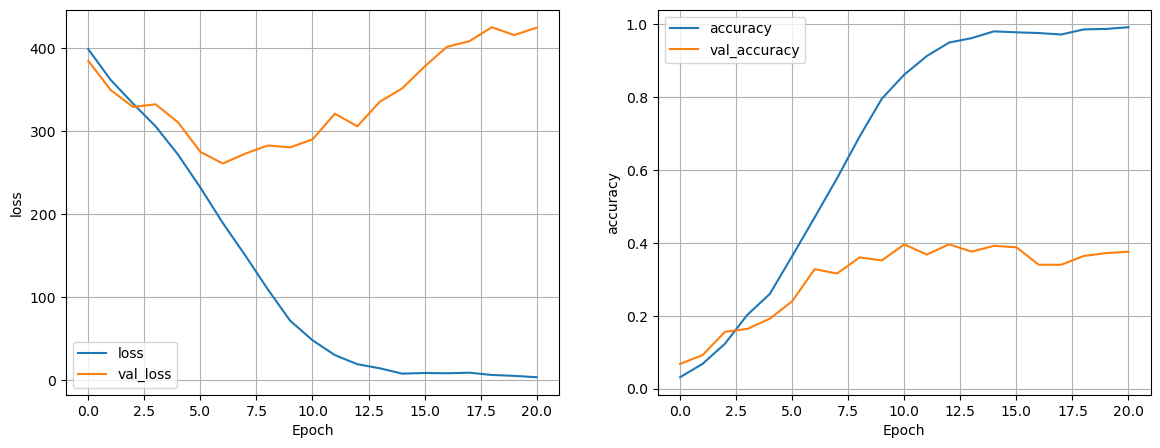

2023-09-03 07:08:35.711482: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_19' with dtype float
	 [[{{node Placeholder/_19}}]]
2023-09-03 07:08:35.711910: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_19' with dtype float
	 [[{{node Placeholder/_19}}]]


9/9 [==============================] - 3s 316ms/step - loss: 3.2474 - accuracy: 0.4440


{'loss': 3.2474071979522705, 'accuracy': 0.4440000057220459}

9/9 [==============================] - 3s 283ms/step


2023-09-03 07:08:41.626225: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [500]
	 [[{{node Placeholder/_4}}]]
2023-09-03 07:08:41.626582: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [500]
	 [[{{node Placeholder/_4}}]]


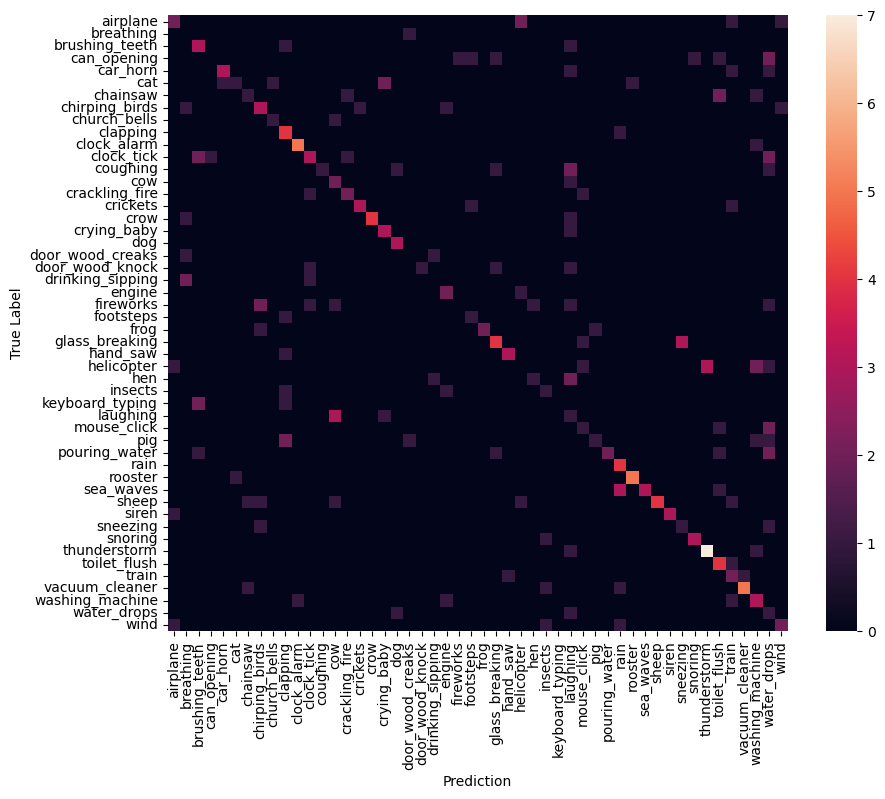

The most misclassified class is water_drops
Audio category: water_drops


The are more audio predicted as water_drops then actually is:
Audio category misclassified as water_drops: pouring_water


In [9]:
# Build the model

model = build_model(n_labels=n_labels, compile=False, **best_params)

epochs = 100
patience = 10 # early stopping patience
lr = best_params['learning_rate']
model, hisotry, confusion_mtx, evaluation = compile_fit_evaluate(df_ESC50, model, train, val, test, label_names,
                                     epochs = epochs,
                                     patience = patience,
                                     loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                                     optimizer =tf.keras.optimizers.legacy.Adam(learning_rate=lr) if sys.platform == 'darwin' or in_colab else tf.keras.optimizers.Adam(learning_rate=lr),
                                     metrics = ['accuracy'],
                                     verbose = 1,
                                     show_history = True,
                                     show_test_evaluation = True,
                                     show_confusion_matrix = True,
                                     listen_to_wrong = True)


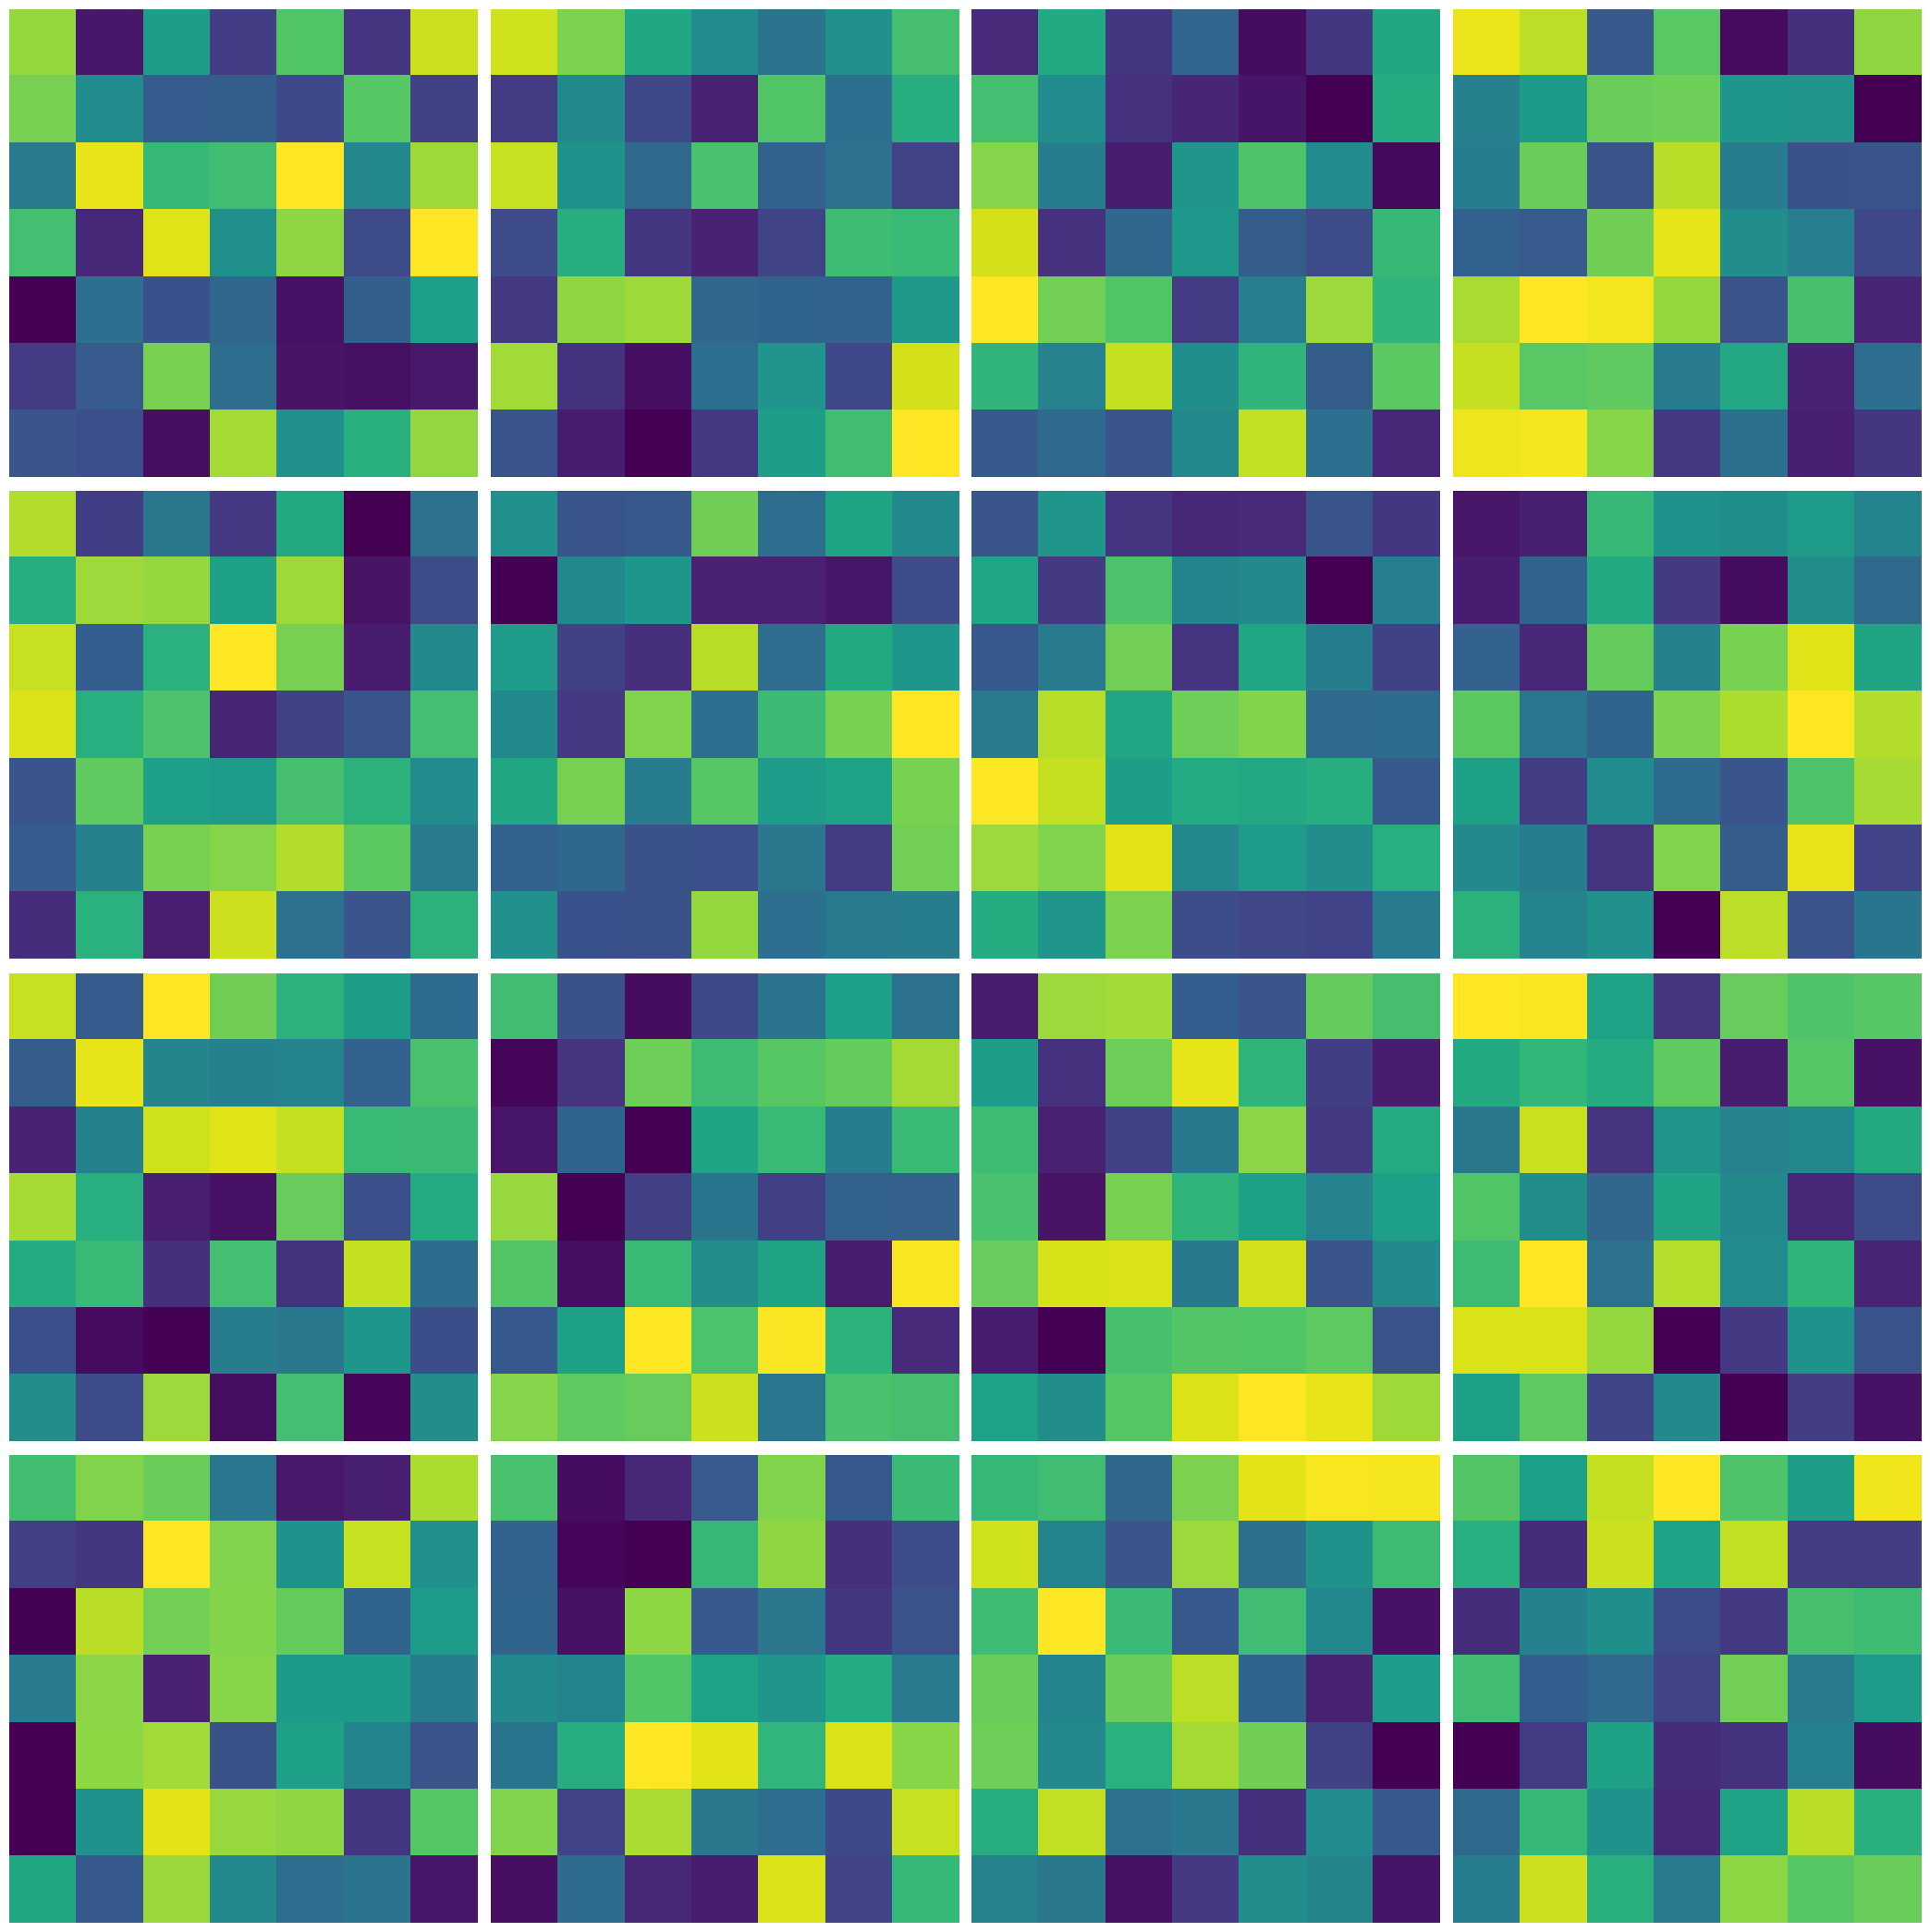

In [15]:
#show the weights of the first layer
visualize_the_weights(model, layer_number = 1, n_filters = 16, verbose = 0)

In [16]:
save_model_path = os.path.join(main_dir,'Saved_Models','ESC50_simple_CNN_STFT_ATTENTION')
# save the model
model.save(save_model_path, save_format  ='keras')


INFO:tensorflow:Assets written to: /Users/leonardo/Desktop/HDA/Human_Data_Analytics_Project_2023/Saved_Models/ESC50_simple_CNN_STFT_ATTENTION/assets


INFO:tensorflow:Assets written to: /Users/leonardo/Desktop/HDA/Human_Data_Analytics_Project_2023/Saved_Models/ESC50_simple_CNN_STFT_ATTENTION/assets
